<a href="https://colab.research.google.com/github/YuzhouLin/current_proj/blob/feature-20210203-devtest/plot_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Load the data
filename = 'results/cv/data_for_ARC.csv'
df = pd.read_csv(filename)
#column_names = ['edl_used', 'sb', 'test_trial', 'threshold', 'RR', 'TAR']
#df_select = df[(df["test_trial"].isin([5])) & (df["RR"]<1)]
df_select = df[df["RR"]<1] # Ignore data with RR = 1

In [3]:
# Calculate average TAR by using bins 
mean_TAR = []
bin_RR = []

for i in range(4):
    data = df_select.loc[df_select.edl_used == i]
    temp_RR = data['RR']
    temp_bins = np.linspace(np.min(temp_RR), np.max(temp_RR), 20)
    temp_bin_index = np.digitize(temp_RR, temp_bins)
    bin_RR.append(temp_bins[:-1])
    mean_TAR.append([np.mean(data['TAR'][temp_bin_index==j]) for j in range(1, len(temp_bins))])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


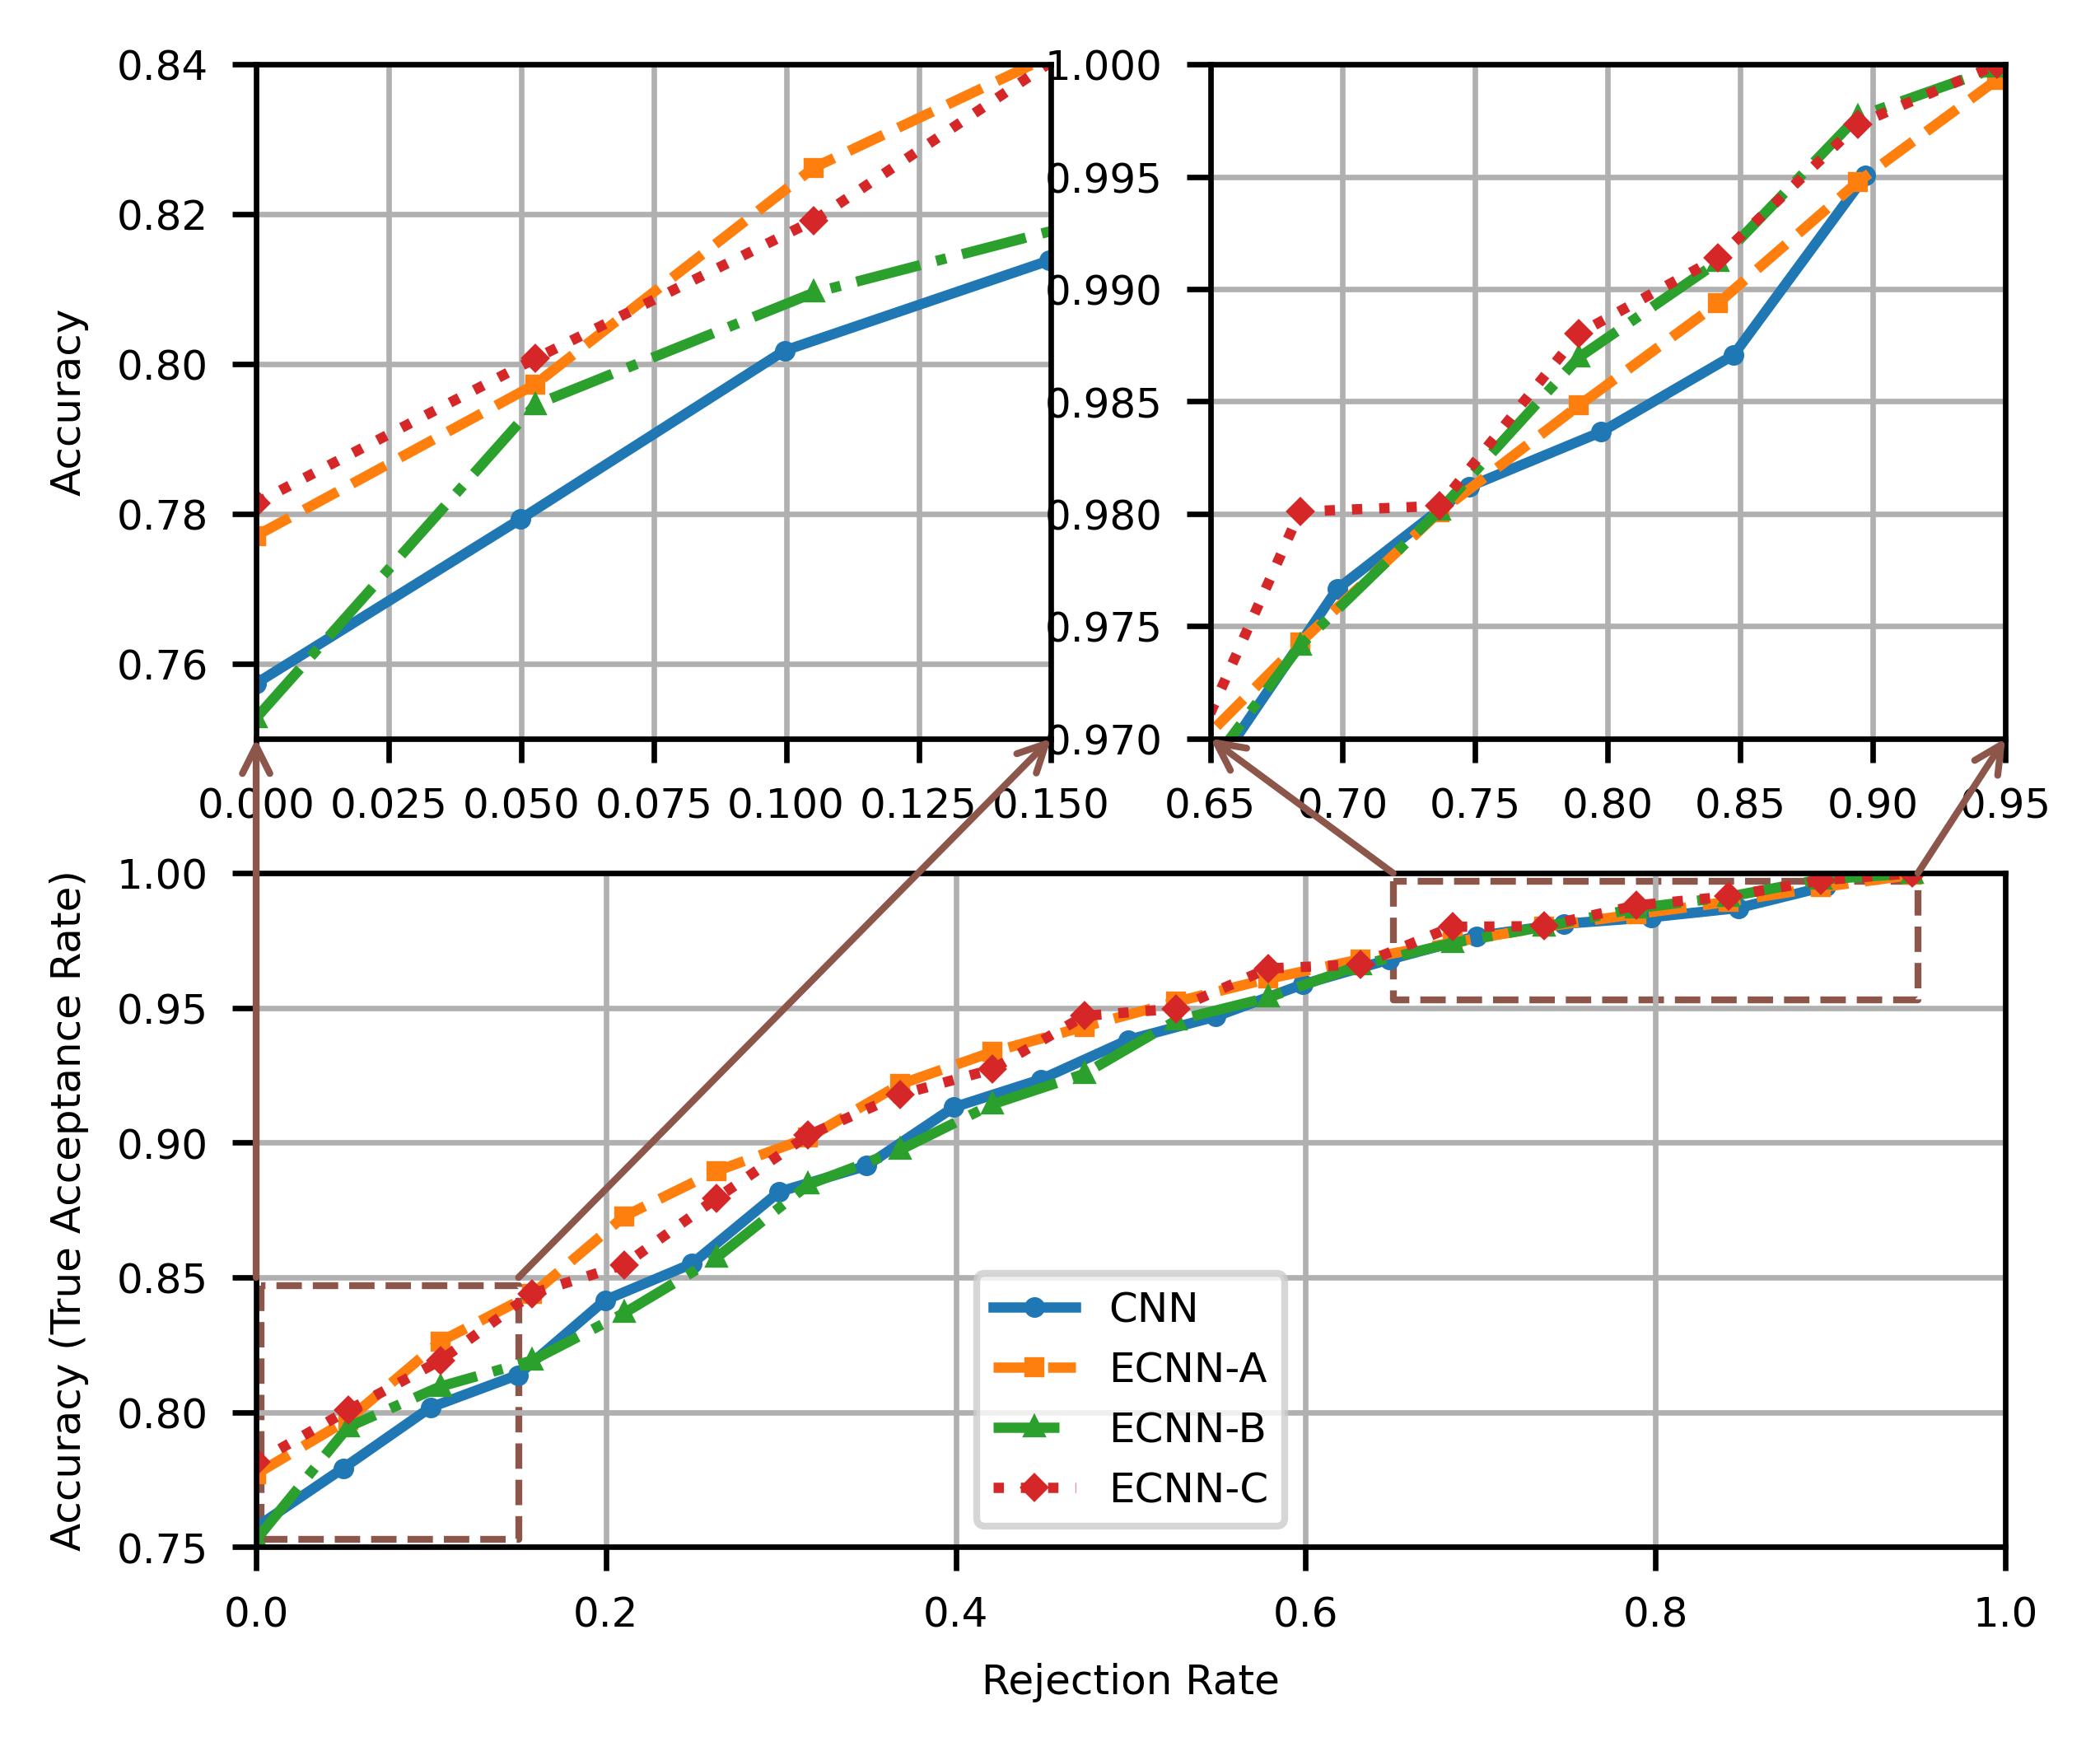

In [6]:
# The version 1 of the ARC plot
#fig = plt.figure(figsize=(3.54, 2.5), dpi=600)
fig = plt.figure(figsize=(3.54, 3), dpi=600)
plt.subplots_adjust(bottom = 0., left = 0, top = 1., right = 1)

# Create first axes, the top-left plot with green plot
sub1 = fig.add_subplot(2,2,1) # two rows, two columns, fist cell

# Create second axes, the top-left plot with orange plot
sub2 = fig.add_subplot(2,2,2) # two rows, two columns, second cell

# Create third axes, a combination of third and fourth cell
sub3 = fig.add_subplot(2,2,(3,4)) # two rows, two colums, combined third and fourth cell

line_styles = ['o-','s--','^-.','D:']
labels = ['CNN', 'ECNN-A', 'ECNN-B', 'ECNN-C']

for i in range(4):
    sub1.plot(bin_RR[i], mean_TAR[i], line_styles[i], markersize=2, label=labels[i])
    sub2.plot(bin_RR[i], mean_TAR[i], line_styles[i], markersize=2, label=labels[i])
    sub3.plot(bin_RR[i], mean_TAR[i], line_styles[i], markersize=2, label=labels[i])
sub1.set_xlim(0, 0.15)
sub1.set_ylim(0.75, 0.84)
sub1.set_ylabel('Accuracy', fontsize=6.0)
sub1.tick_params(labelsize=6.0)
sub1.grid(b=True, which='both')

sub2.set_xlim(0.65, 0.95)
sub2.set_ylim(0.97, 1.0)
sub2.tick_params(labelsize=6.0)
sub2.grid(b=True, which='both')

sub3.set_xlim(0, 1.0)
sub3.set_ylim(0.75, 1.0)
sub3.set_ylabel('Accuracy (True Acceptance Rate)', fontsize=6.0)
sub3.set_xlabel('Rejection Rate', fontsize=6.0)
sub3.tick_params(labelsize=6.0)
sub3.grid(b=True, which='both')
sub3.legend(fontsize=6.0, loc='lower center')

# Create blocked area in third axes
#sub3.fill_between((0,0.15), 0, 1, facecolor='green', alpha=0.2) # blocked area 
sub3.fill_between((0.003,0.15), 0.753, 0.847,  facecolor='none', edgecolor='tab:brown', linestyle='--') # blocked area for first axes
sub3.fill_between((0.65,0.95), 0.953, 0.997, facecolor='none', edgecolor='tab:brown', linestyle='--') # blocked area for second axes

#rect1 = matplotlib.patches.Rectangle((0,0.85), 0.15, 0.1, linewidth=1, edgecolor='r', facecolor='none')
#sub3.add_patch(rect1)

# Create left side of Connection patch for first axes
con1 = matplotlib.patches.ConnectionPatch(xyA=(0, .75), coordsA=sub1.transData, arrowstyle="<-", xyB=(0, 0.85), coordsB=sub3.transData, color = 'tab:brown')

# Add left side to the figure
fig.add_artist(con1)

# Create right side of Connection patch for first axes
con2 = matplotlib.patches.ConnectionPatch(xyA=(0.15, .75), coordsA=sub1.transData, arrowstyle="<-", xyB=(0.15, 0.85), coordsB=sub3.transData, color = 'tab:brown')
# Add right side to the figure
fig.add_artist(con2)

# Create left side of Connection patch for second axes
con3 = matplotlib.patches.ConnectionPatch(xyA=(0.65, .97), coordsA=sub2.transData, arrowstyle="<-", xyB=(.65, 1), coordsB=sub3.transData, color = 'tab:brown')
# Add left side to the figure
fig.add_artist(con3)

# Create right side of Connection patch for second axes
con4 = matplotlib.patches.ConnectionPatch(xyA=(.95, .97), coordsA=sub2.transData, arrowstyle="<-", xyB=(.95, 1), coordsB=sub3.transData, color = 'tab:brown')
# Add right side to the figure
fig.add_artist(con4)

# Save figure with nice margin
plt.savefig('results/ARC_mean_with_zoomed2.png', dpi = 600, bbox_inches = 'tight', pad_inches = .0)
plt.savefig('results/ARC_mean_with_zoomed2.eps', dpi = 600, bbox_inches = 'tight', pad_inches = .0)

'\nplt.savefig("./results/ARC_mean.eps", format=\'eps\', bbox_inches=\'tight\', dpi=600, pad_inches=0.0)\nplt.savefig("./results/ARC_mean.png", format=\'png\', bbox_inches=\'tight\', dpi=600, pad_inches=0.0)\n'

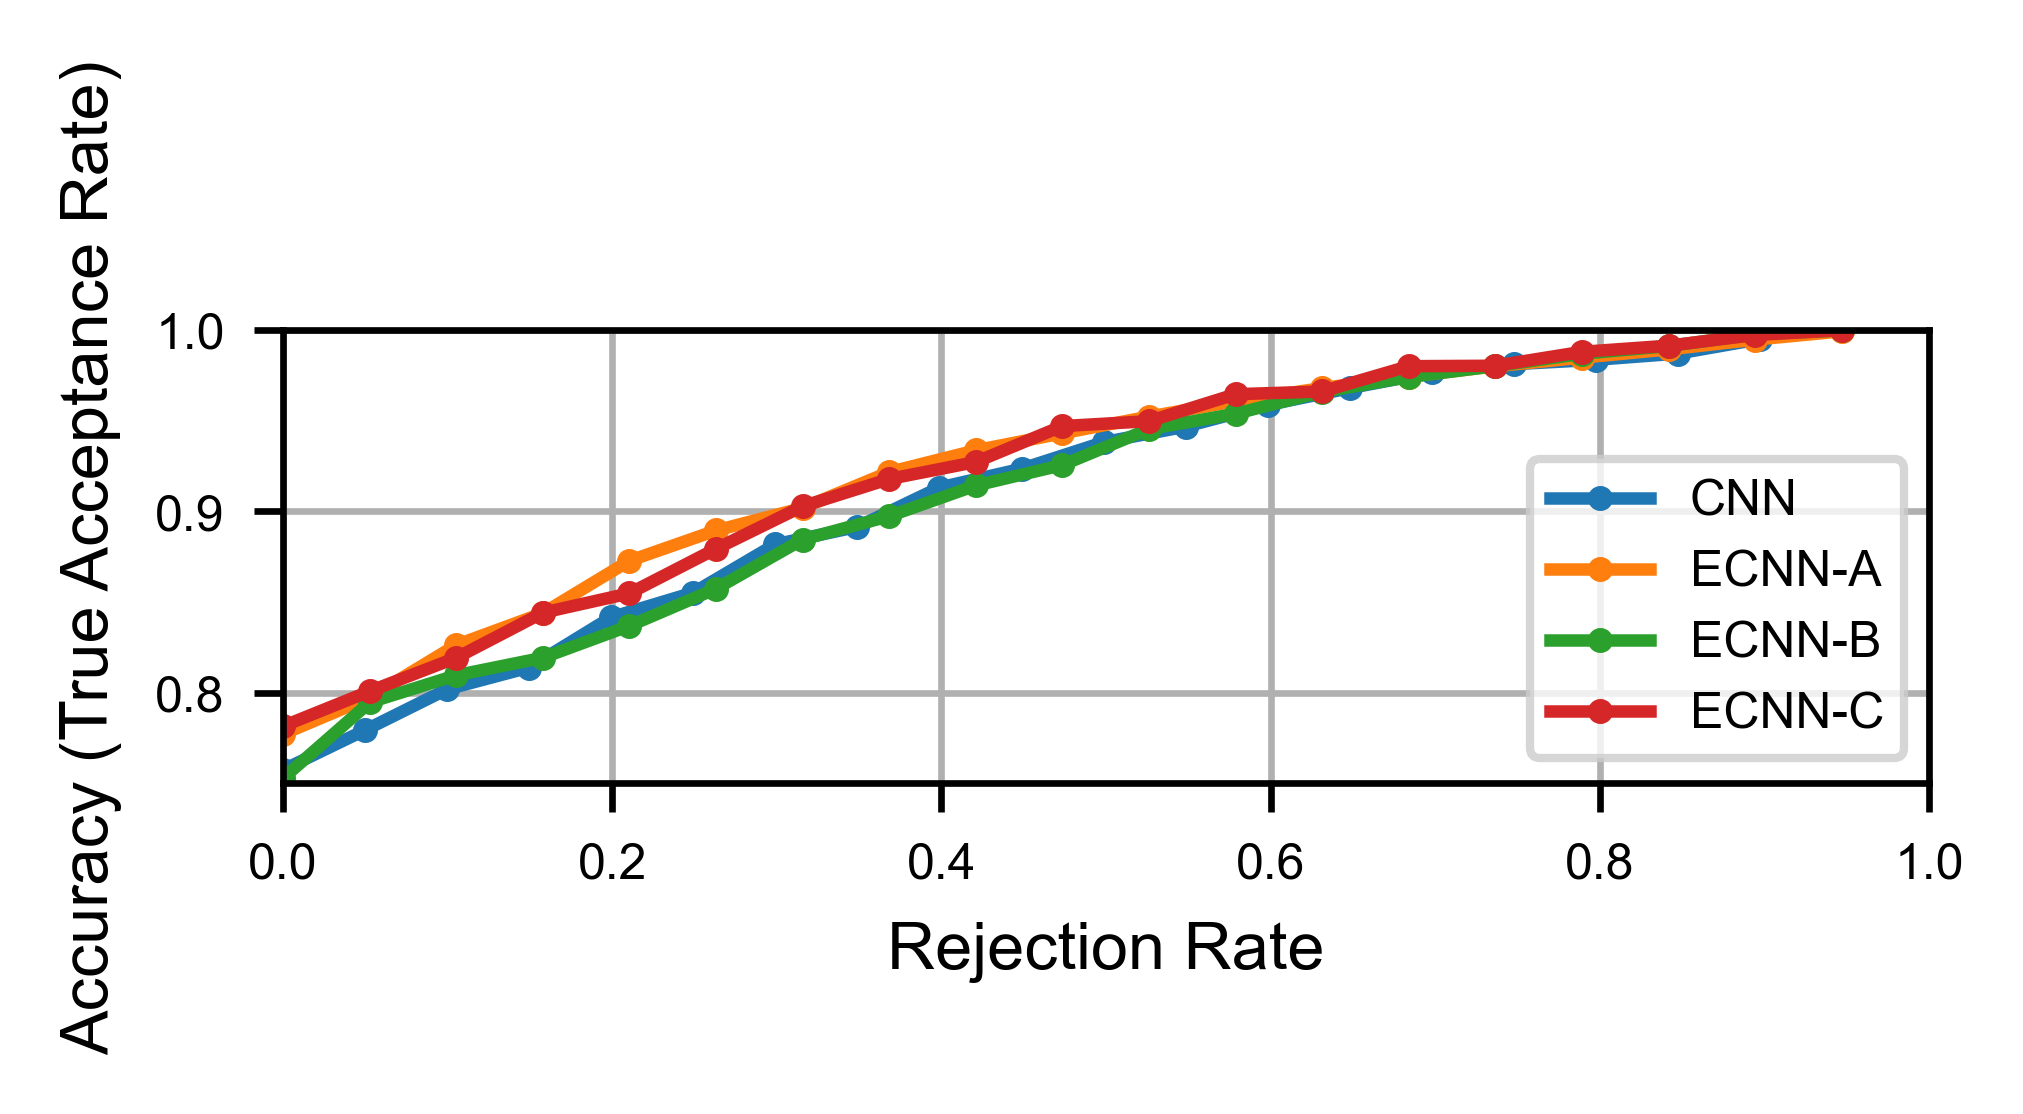

In [255]:
# Another version of ARC plot
_, ax = plt.subplots(1, figsize=(3.54,1.0), dpi=600)

line_styles = ['o-','o-','o-','o-']
labels = ['CNN', 'ECNN-A', 'ECNN-B', 'ECNN-C']
for i in range(4):
    ax.plot(bin_RR[i], mean_TAR[i], line_styles[i], markersize=2, label=labels[i])

ax.set_xlim((0,1.0))
ax.set_ylim((0.75,1.0))
ax.set_xlabel('Rejection Rate', fontsize=8.0)
ax.set_ylabel('Accuracy (True Acceptance Rate)', fontsize=8.0)
ax.tick_params(labelsize=6.0)
ax.grid(b=True, which='both')
ax.legend(fontsize=6.0, loc='best')

plt.rcParams['font.sans-serif'] = ['Arial']

'''
plt.savefig("./results/ARC_mean.eps", format='eps', bbox_inches='tight', dpi=600, pad_inches=0.0)
plt.savefig("./results/ARC_mean.png", format='png', bbox_inches='tight', dpi=600, pad_inches=0.0)
'''

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

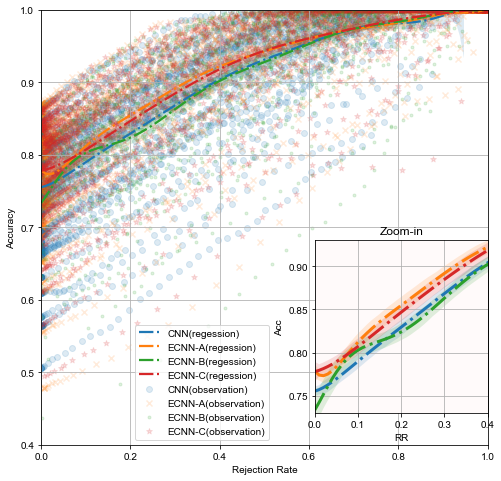

In [202]:
# ARC plot using regression
_, ax = plt.subplots(figsize=(8,8))

scatter_markers = ["o", "x", ".", "*"]
lines_styles = ["-.", "-.", "-.", "-."]
legend_names = ['CNN', 'ECNN-A', 'ECNN-B', 'ECNN-C']
legend_colors = ['tab:blue','tab:orange','tab:green','tab:red']

n_bootstrap=100
reg_order=10


for d, m, ls, lb, color in zip(df_select['edl_used'].unique(), scatter_markers, lines_styles, legend_names, legend_colors):
    #sns.regplot(x="RR", y="TAR", x_estimator=np.mean, data=df_select.loc[df_select.edl_used == d], marker=m, line_kws={"ls":ls}, ax=ax, label=lb)
    sns.regplot(x="RR", y="TAR", order=reg_order, data=df_select.loc[df_select.edl_used == d], marker=m, scatter_kws={'alpha':0.15}, line_kws={"ls":ls, "color": color, "label": lb+'(regession)'}, ax=ax, label=lb+'(observation)')

# order=2,  
#ci= 95, n_boot=100, 

ax.set_xlabel('Rejection Rate')
ax.set_ylabel('Accuracy')
ax.set_xlim((0,1))
ax.set_ylim((0.4,1))
ax.legend(loc='lower left', bbox_to_anchor=(0.2,0))
ax.grid(b=True)


#ax2 = plt.axes([0.6, 0.4, .3, .3], facecolor='snow')
ax2 = plt.axes([0.6, 0.18, .3, .3], facecolor='snow')

for d, m, ls, lb, color in zip(df_select['edl_used'].unique(),scatter_markers, lines_styles, legend_names, legend_colors):
    sns.regplot(x="RR", y="TAR", order=reg_order, data=df_select.loc[df_select.edl_used == d], marker=m, scatter_kws={'alpha':0}, line_kws={"ls":ls, "color": color, "lw": 3}, ax=ax2)

ax2.set_title("Zoom-in")
ax2.set_xlim((0,0.4))
ax2.set_ylim((0.73,0.93))
ax2.set_xlabel('RR')
ax2.set_ylabel('Acc')
ax2.grid(b=True, which='both')


#plt.legend(loc='lower right')
plt.rcParams['font.sans-serif'] = ['Arial']

plt.savefig("./results/ARC.eps", format='eps', bbox_inches='tight', dpi=600, pad_inches=0.0)
plt.savefig("./results/ARC.png", format='png', bbox_inches='tight', dpi=600, pad_inches=0.0)